# 구글 드라이브 연결

In [1]:
# 구글 드라이브 연결(데이터 로드를 위해서)
from google.colab import drive

drive.mount('/content/data')

Mounted at /content/data


# [영화 평가 데이터](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset/data)
- 이 파일에는 Full MovieLens 데이터셋에 등록된 45,000편의 영화에 대한 메타데이터가 포함되어 있습니다.
- 이 데이터셋은 2017년 7월 이전에 개봉한 영화로 구성되어 있습니다. 데이터 포인트에는 출연진, 제작진, 줄거리 키워드, 예산, 수익, 포스터, 개봉일, 언어, 제작사, 국가, TMDB 투표 수 및 투표 평균 등이 포함됩니다.
- 이 데이터세트에는 45,000편의 영화에 대해 27만 명의 사용자가 작성한 2,600만 건의 평점이 포함된 파일도 포함되어 있습니다.
- 평점은 1점부터 5점까지의 점수로 매겨지며, GroupLens 공식 웹사이트에서 수집되었습니다.

## 데이터(파일) 설명

- movies_metadata.csv
  - 주요 영화 메타데이터 파일입니다.
  - Full MovieLens 데이터세트에 포함된 45,000편의 영화에 대한 정보가 포함되어 있습니다.
  - 포스터, 배경, 예산, 수익, 개봉일, 언어, 제작 국가 및 제작사 등의 정보가 포함됩니다.
- links_small.csv
  - 전체 데이터 세트의 9,000개 영화 중 작은 하위 세트의 TMDB 및 IMDB ID를 포함합니다.
- ratings_small.csv
  - 9,000편의 영화에 대한 700명의 사용자의 100,000개 평가의 하위 집합입니다.

# 데이터

## 데이터 로드

In [2]:
# 데이터 분석에 사용할 라이브러리
import numpy as np
import pandas as pd

DATA_PATH = "/content/data/MyDrive/ai_lecture/6. Recommendation System/data/Movies Dataset/"

### Movies Metadata

In [3]:
movies_metadata = pd.read_csv(DATA_PATH+'movies_metadata.csv')

movies_metadata.shape

/tmp/ipython-input-3-2843536420.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_metadata = pd.read_csv(DATA_PATH+'movies_metadata.csv')


(45466, 24)

In [4]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
movies_metadata[['id', 'imdb_id', 'title', 'overview']].head()

,id,imdb_id,title,overview
0,862,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ..."
1,8844,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...
2,15602,tt0113228,Grumpier Old Men,A family wedding reignites the ancient feud be...
3,31357,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom..."
4,11862,tt0113041,Father of the Bride Part II,Just when George Banks has recovered from his ...


> 노이즈 데이터 제거

In [6]:
# 노이즈 데이터 확인
movies_metadata.iloc[[19730, 29503, 35587]][['id', 'imdb_id', 'title', 'overview']]

,id,imdb_id,title,overview
19730,1997-08-20,0,NaN,Released
29503,2012-09-29,0,NaN,Released
35587,2014-01-01,0,NaN,Released


In [7]:
# 노이즈 데이터 제거
movies_metadata = movies_metadata.drop([19730, 29503, 35587])

#### Links Small

In [8]:
links_small = pd.read_csv(DATA_PATH+'links_small.csv')

links_small.shape

(9125, 3)

In [9]:
# 결측치 제거 및 데이터 형변환
links_small = links_small[links_small['tmdbId'].notnull()]['tmdbId'].astype('int')
links_small.shape

(9112,)

In [10]:
# links_small에 포함된 id만 사용
movies_metadata_small = movies_metadata[movies_metadata['id'].isin(links_small.astype('str'))]
movies_metadata_small.shape

(9099, 24)

#### movies_keywords

In [11]:
movies_keywords = pd.read_csv(DATA_PATH+'keywords.csv')

movies_keywords.columns

Index(['id', 'keywords'], dtype='object')

In [12]:
movies_metadata_small['id'] = movies_metadata_small['id'].astype('str')
movies_keywords['id'] = movies_keywords['id'].astype('str')

# 영화 아이디(id)를 기준으로 데이터를 합치기
movies_metadata_small = movies_metadata_small.merge(movies_keywords, on=['id'])

# 결과 확인
movies_metadata_small.shape

/tmp/ipython-input-12-1618596873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_metadata_small['id'] = movies_metadata_small['id'].astype('str')


(9151, 25)

### Ratings Small

In [13]:
ratings_small = pd.read_csv(DATA_PATH+"ratings_small.csv")

ratings_small.shape

(100004, 4)

In [14]:
ratings_small.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [15]:
ratings_small.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### Merge(합치기)

> 합치기전 사전작업

In [16]:
# 데이터 타입 변환
movies_metadata_small['id'] = movies_metadata_small['id'].astype('int')

# 컬럼명 변경
movies_metadata_small.rename(columns={
    'id':'movieId'
}, inplace=True)

> 데이터 합치기

In [17]:
ratings = ratings_small[['userId',	'movieId',	'rating', 'timestamp']].merge(movies_metadata_small[['movieId', 'title', 'genres', 'keywords', 'overview']], on=['movieId'])

ratings.shape

(32146, 8)

In [18]:
ratings.head()

,userId,movieId,rating,timestamp,title,genres,keywords,overview
0,1,1371,2.5,1260759135,Rocky III,"[{'id': 18, 'name': 'Drama'}]","[{'id': 396, 'name': 'transporter'}, {'id': 14...","Now the world champion, Rocky Balboa is living..."
1,1,1405,1.0,1260759203,Greed,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...","[{'id': 1321, 'name': 'gold'}, {'id': 4258, 'n...",Greed is the classic 1924 silent film by Erich...
2,1,2105,4.0,1260759139,American Pie,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[{'id': 3687, 'name': 'graduation'}, {'id': 61...","At a high-school party, four friends find that..."
3,1,2193,2.0,1260759198,My Tutor,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 6274, 'name': 'learning and teaching'}...",High school senior Bobby Chrystal fails his Fr...
4,1,2294,2.0,1260759108,Jay and Silent Bob Strike Back,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 886, 'name': 'film making'}, {'id': 16...",When Jay and Silent Bob learn that their comic...


# 데이터 분석

> rating(별점) 분포도 확인

In [19]:
ratings['rating'].describe()

,rating
count,32146.000000
mean,3.585532
std,1.047118
min,0.500000
25%,3.000000
50%,4.000000
75%,4.000000
max,5.000000


> 사용자 분석

In [20]:
print(f"전체 사용자의 수: {ratings['userId'].nunique()}")

# 사용자별 영화 본 수
ratings['userId'].value_counts()

전체 사용자의 수: 671


,count
userId,
564,656
547,439
452,378
311,352
15,346
...,...
158,3
71,3
446,2


> 영화 분석

In [21]:
print(f"전체 영화 수: {ratings['title'].nunique()}")

# 영화별 사용자가 본 수
ratings['title'].value_counts()

전체 영화 수: 1535


,count
title,
Terminator 3: Rise of the Machines,324
The Million Dollar Hotel,311
Solaris,305
The 39 Steps,291
Monsoon Wedding,274
...,...
Stromboli,1
The Mexican,1
Equilibrium,1


# 데이터 전처리

## 영화별 데이터

In [22]:
movie_by_movieId = ratings[['movieId', 'title', 'genres', 'keywords', 'overview']]\
                    .drop_duplicates(subset='movieId',keep='first',ignore_index=True)

print(f"{movie_by_movieId.shape}")
movie_by_movieId.head()

(1548, 5)


,movieId,title,genres,keywords,overview
0,1371,Rocky III,"[{'id': 18, 'name': 'Drama'}]","[{'id': 396, 'name': 'transporter'}, {'id': 14...","Now the world champion, Rocky Balboa is living..."
1,1405,Greed,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...","[{'id': 1321, 'name': 'gold'}, {'id': 4258, 'n...",Greed is the classic 1924 silent film by Erich...
2,2105,American Pie,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[{'id': 3687, 'name': 'graduation'}, {'id': 61...","At a high-school party, four friends find that..."
3,2193,My Tutor,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 6274, 'name': 'learning and teaching'}...",High school senior Bobby Chrystal fails his Fr...
4,2294,Jay and Silent Bob Strike Back,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 886, 'name': 'film making'}, {'id': 16...",When Jay and Silent Bob learn that their comic...


### 장르(genres) 전처리

In [23]:
from ast import literal_eval

movie_by_movieId['str_genres'] = movie_by_movieId['genres'].fillna('[]')\
                    .apply(literal_eval)\
                    .apply(lambda x: sorted([i['name'] for i in x]) if isinstance(x, list) else [])\
                    .apply(lambda x: ", ".join(x) if len(x) > 0 else None)

movie_by_movieId[['str_genres', 'genres']].head()

,str_genres,genres
0,Drama,"[{'id': 18, 'name': 'Drama'}]"
1,"Drama, History","[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name..."
2,"Comedy, Romance","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
3,"Comedy, Drama, Romance","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam..."
4,Comedy,"[{'id': 35, 'name': 'Comedy'}]"


### 키워드(keywords) 전처리

In [24]:
movie_by_movieId['str_keywords'] = movie_by_movieId['keywords'].fillna('[]')\
                    .apply(literal_eval)\
                    .apply(lambda x: sorted([i['name'] for i in x]) if isinstance(x, list) else [])\
                    .apply(lambda x: ", ".join(x) if len(x) > 0 else None)

movie_by_movieId[['str_keywords', 'keywords']].head()

,str_keywords,keywords
0,"boxer, boxing match, challenger, comeback, def...","[{'id': 396, 'name': 'transporter'}, {'id': 14..."
1,"death, dentist, gold, gold mine, lottery, lott...","[{'id': 1321, 'name': 'gold'}, {'id': 4258, 'n..."
2,"coming of age, exchange student, graduation, h...","[{'id': 3687, 'name': 'graduation'}, {'id': 61..."
3,"learning and teaching, older woman younger man...","[{'id': 6274, 'name': 'learning and teaching'}..."
4,"animal experimentation, character is subject o...","[{'id': 886, 'name': 'film making'}, {'id': 16..."


In [25]:
ratings.head()

,userId,movieId,rating,timestamp,title,genres,keywords,overview
0,1,1371,2.5,1260759135,Rocky III,"[{'id': 18, 'name': 'Drama'}]","[{'id': 396, 'name': 'transporter'}, {'id': 14...","Now the world champion, Rocky Balboa is living..."
1,1,1405,1.0,1260759203,Greed,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...","[{'id': 1321, 'name': 'gold'}, {'id': 4258, 'n...",Greed is the classic 1924 silent film by Erich...
2,1,2105,4.0,1260759139,American Pie,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[{'id': 3687, 'name': 'graduation'}, {'id': 61...","At a high-school party, four friends find that..."
3,1,2193,2.0,1260759198,My Tutor,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 6274, 'name': 'learning and teaching'}...",High school senior Bobby Chrystal fails his Fr...
4,1,2294,2.0,1260759108,Jay and Silent Bob Strike Back,"[{'id': 35, 'name': 'Comedy'}]","[{'id': 886, 'name': 'film making'}, {'id': 16...",When Jay and Silent Bob learn that their comic...


### 합치기

In [26]:
ratings = ratings[['userId', 'movieId', 'title', 'rating', 'timestamp', 'overview']]\
  .merge(movie_by_movieId[['movieId', 'str_genres', 'str_keywords']], on=['movieId'])

ratings.head()

,userId,movieId,title,rating,timestamp,overview,str_genres,str_keywords
0,1,1371,Rocky III,2.5,1260759135,"Now the world champion, Rocky Balboa is living...",Drama,"boxer, boxing match, challenger, comeback, def..."
1,1,1405,Greed,1.0,1260759203,Greed is the classic 1924 silent film by Erich...,"Drama, History","death, dentist, gold, gold mine, lottery, lott..."
2,1,2105,American Pie,4.0,1260759139,"At a high-school party, four friends find that...","Comedy, Romance","coming of age, exchange student, graduation, h..."
3,1,2193,My Tutor,2.0,1260759198,High school senior Bobby Chrystal fails his Fr...,"Comedy, Drama, Romance","learning and teaching, older woman younger man..."
4,1,2294,Jay and Silent Bob Strike Back,2.0,1260759108,When Jay and Silent Bob learn that their comic...,Comedy,"animal experimentation, character is subject o..."


## 평점 데이터 전처리

### 데이터 정규화
- 각 영화의 평균 평점을 빼는 방식으로 데이터를 정규화할 것입니다.

In [27]:
ratings_by_movieId = ratings.groupby(['movieId'])\
  .agg({'rating':'mean'})\
  .rename(columns={
    'rating':'mean'
  })\
  .reset_index()

# 영화별 평점의 평균값
ratings_by_movieId.head()

,movieId,mean
0,2,3.401869
1,5,3.267857
2,6,3.884615
3,11,3.689024
4,12,2.861111


In [28]:
# 영화별 평균 추가
ratings = ratings.merge(ratings_by_movieId, on=['movieId'])

ratings.head()

,userId,movieId,title,rating,timestamp,overview,str_genres,str_keywords,mean
0,1,1371,Rocky III,2.5,1260759135,"Now the world champion, Rocky Balboa is living...",Drama,"boxer, boxing match, challenger, comeback, def...",3.053191
1,1,1405,Greed,1.0,1260759203,Greed is the classic 1924 silent film by Erich...,"Drama, History","death, dentist, gold, gold mine, lottery, lott...",3.032609
2,1,2105,American Pie,4.0,1260759139,"At a high-school party, four friends find that...","Comedy, Romance","coming of age, exchange student, graduation, h...",3.478723
3,1,2193,My Tutor,2.0,1260759198,High school senior Bobby Chrystal fails his Fr...,"Comedy, Drama, Romance","learning and teaching, older woman younger man...",3.202381
4,1,2294,Jay and Silent Bob Strike Back,2.0,1260759108,When Jay and Silent Bob learn that their comic...,Comedy,"animal experimentation, character is subject o...",3.273585


In [29]:
# 평점 정규화
ratings['norm_rating'] = ratings.apply(lambda row: row['rating'] - row['mean'], axis=1)

ratings[['movieId', 'rating', 'mean', 'norm_rating']].head()

,movieId,rating,mean,norm_rating
0,1371,2.5,3.053191,-0.553191
1,1405,1.0,3.032609,-2.032609
2,2105,4.0,3.478723,0.521277
3,2193,2.0,3.202381,-1.202381
4,2294,2.0,3.273585,-1.273585


### 정규성 변환

<Axes: ylabel='Count'>

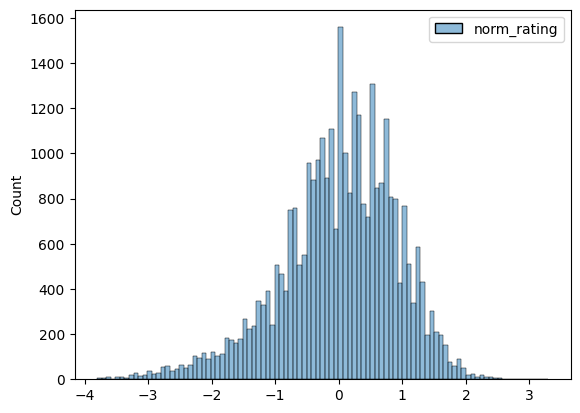

In [30]:
import seaborn as sns

# 왜도 확인
# -> 정규분포를 따르기 때문에 따로 정규성 변환 작업하지 않음
sns.histplot(ratings[['norm_rating']])

### new rating with MinMax Scaling

In [31]:
# 스케일링 적용(범위1~5)
def minmax_scaling(data, min, max):
  scale = max - min
  return 1 + ((data - min) / scale)*4

In [32]:
# 최소값
rating_min = ratings['norm_rating'].min()
# 최대값
rating_max = ratings['norm_rating'].max()

# 스케일링 적용(범위1~5)
ratings['new_rating'] = ratings['norm_rating'].map(
  lambda x: minmax_scaling(x, rating_min, rating_max)
)

ratings[['movieId', 'rating', 'norm_rating', 'new_rating']].head()

,movieId,rating,norm_rating,new_rating
0,1371,2.5,-0.553191,2.832340
1,1405,1.0,-2.032609,1.998271
2,2105,4.0,0.521277,3.438105
3,2193,2.0,-1.202381,2.466338
4,2294,2.0,-1.273585,2.426195


<Axes: ylabel='Count'>

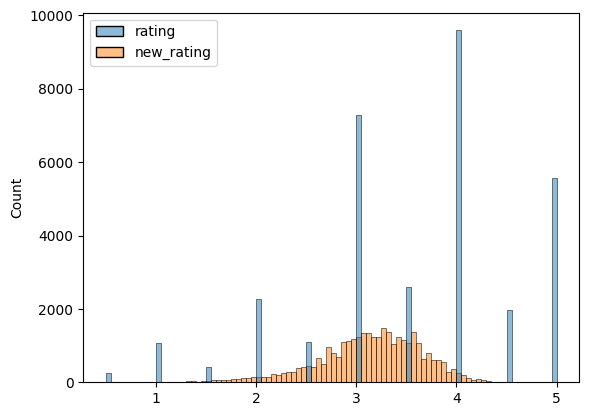

In [33]:
sns.histplot(ratings[['rating', 'new_rating']])

## 데이터 결측치 제거

In [34]:
print(f"movies.shape: {ratings.shape}")
(ratings.isnull().sum() / ratings.shape[0])\
  .round(4)\
  .sort_values(ascending=False)

movies.shape: (32146, 11)


,0
str_keywords,0.0041
str_genres,0.0023
overview,0.0002
title,0.0000
movieId,0.0000
userId,0.0000
timestamp,0.0000
rating,0.0000
mean,0.0000
norm_rating,0.0000


In [35]:
# 결측치 데이터 제거
ratings = ratings.dropna()
# 인덱스 재정의
ratings = ratings.reset_index(drop=True)

# 확인
print(f"ratings.shape: {ratings.shape}")
(ratings.isnull().sum() / ratings.shape[0])\
  .round(4)\
  .sort_values(ascending=False)

ratings.shape: (31935, 11)


,0
userId,0.0
movieId,0.0
title,0.0
rating,0.0
timestamp,0.0
overview,0.0
str_genres,0.0
str_keywords,0.0
mean,0.0
norm_rating,0.0


## 중복 데이터 제거

In [36]:
print(f"중복 제거 전: {ratings.shape}")

ratings = ratings.drop_duplicates(keep='last',ignore_index=True)
print(f"중복 제거 후: {ratings.shape}")

중복 제거 전: (31935, 11)
중복 제거 후: (31920, 11)


# 저장하기

In [37]:
# 필요한 컬럼만 추출
ratings = ratings[
    ['userId', 'movieId', 'title', 'new_rating'
    , 'overview', 'str_genres', 'str_keywords']]

print(f"shape: {ratings.shape}")
ratings.head()

shape: (31920, 7)


,userId,movieId,title,new_rating,overview,str_genres,str_keywords
0,1,1371,Rocky III,2.832340,"Now the world champion, Rocky Balboa is living...",Drama,"boxer, boxing match, challenger, comeback, def..."
1,1,1405,Greed,1.998271,Greed is the classic 1924 silent film by Erich...,"Drama, History","death, dentist, gold, gold mine, lottery, lott..."
2,1,2105,American Pie,3.438105,"At a high-school party, four friends find that...","Comedy, Romance","coming of age, exchange student, graduation, h..."
3,1,2193,My Tutor,2.466338,High school senior Bobby Chrystal fails his Fr...,"Comedy, Drama, Romance","learning and teaching, older woman younger man..."
4,1,2294,Jay and Silent Bob Strike Back,2.426195,When Jay and Silent Bob learn that their comic...,Comedy,"animal experimentation, character is subject o..."


## 평점 저장

In [39]:
movie_rating = ratings[['userId', 'movieId', 'new_rating']]
movie_rating.reset_index(inplace=True)
movie_rating.rename(columns={'index':'id', 'new_rating':'rating'}, inplace=True)

print(f"shape: {movie_rating.shape}")
movie_rating.head()

shape: (31920, 4)


/tmp/ipython-input-39-1939869564.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_rating.rename(columns={'index':'id', 'new_rating':'rating'}, inplace=True)


,id,userId,movieId,rating
0,0,1,1371,2.832340
1,1,1,1405,1.998271
2,2,1,2105,3.438105
3,3,1,2193,2.466338
4,4,1,2294,2.426195


In [40]:
save_file = "movie_rating.csv"

movie_rating.to_csv(save_file, sep=',', index=False, header=True)

In [41]:
movie_rating = pd.read_csv(save_file, sep=',')

print(f"shape: {movie_rating.shape}")
movie_rating.head()

shape: (31920, 4)


,id,userId,movieId,rating
0,0,1,1371,2.832340
1,1,1,1405,1.998271
2,2,1,2105,3.438105
3,3,1,2193,2.466338
4,4,1,2294,2.426195


## 영화 메타정보 저장

In [42]:
movie_metadata = ratings[
    ['movieId', 'title'
    , 'overview', 'str_genres', 'str_keywords']]

movie_metadata = movie_metadata.drop_duplicates(subset='movieId', keep='last',ignore_index=True)
print(movie_metadata.shape)
movie_metadata.head()

(1518, 5)


,movieId,title,overview,str_genres,str_keywords
0,2086,Nick of Time,Gene Watson is a public accountant who arrives...,"Crime, Drama, Thriller","assassination, los angeles, politics, train st..."
1,3780,Red Beard,"Set in feudal times, novice physician, Yuzo Ka...",Drama,"career, clinic, doctor, heal, intern, japan, j..."
2,5000,Forbidden Games,"Orphaned after a Nazi air raid, Paulette, a yo...","Drama, History","abandonment, cross, dead animal, death, exodus..."
3,6037,Murder by Death,Lionel Twain invites the world's five greatest...,"Comedy, Crime, Mystery, Thriller","butler, cadaver, charlie chan, deaf-mute, dete..."
4,703,Annie Hall,"In the city of New York, comedian Alvy Singer ...","Comedy, Drama, Romance","breaking the fourth wall, comedian, jewish, jo..."


In [43]:
save_file = "movie_meta.csv"

movie_metadata[['movieId', 'title', 'overview']]\
  .to_csv(save_file, sep=',', index=False, header=True)

In [44]:
movie_meta = pd.read_csv(save_file, sep=',')

print(f"shape: {movie_meta.shape}")
movie_meta.head()

shape: (1518, 3)


,movieId,title,overview
0,2086,Nick of Time,Gene Watson is a public accountant who arrives...
1,3780,Red Beard,"Set in feudal times, novice physician, Yuzo Ka..."
2,5000,Forbidden Games,"Orphaned after a Nazi air raid, Paulette, a yo..."
3,6037,Murder by Death,Lionel Twain invites the world's five greatest...
4,703,Annie Hall,"In the city of New York, comedian Alvy Singer ..."


## 영화 장르 저장

In [45]:
# 'str_genres' 열을 쉼표로 분리하여 리스트로 만듦
movie_metadata['str_genres_list'] = movie_metadata['str_genres'].str.split(', ')

# 각 장르별로 행을 분리하여 새로운 DataFrame 생성
genres_expanded = movie_metadata.explode('str_genres_list')

# 필요한 열만 선택하고 열 이름 변경
genres_expanded = genres_expanded[['movieId', 'str_genres_list']].rename(columns={'str_genres_list': 'genre'})

print(genres_expanded.shape)
genres_expanded.head()

(3964, 2)


,movieId,genre
0,2086,Crime
0,2086,Drama
0,2086,Thriller
1,3780,Drama
2,5000,Drama


In [46]:
save_file = "movie_genre.csv"

genres_expanded[['movieId', 'genre']]\
  .to_csv(save_file, sep=',', index=False, header=True)

In [47]:
movie_genre = pd.read_csv(save_file, sep=',')

print(f"shape: {movie_genre.shape}")
movie_genre.head()

shape: (3964, 2)


,movieId,genre
0,2086,Crime
1,2086,Drama
2,2086,Thriller
3,3780,Drama
4,5000,Drama


## 영화 키워드 저장

In [48]:
# 'str_keywords' 열을 쉼표로 분리하여 리스트로 만듦
movie_metadata['str_keywords_list'] = movie_metadata['str_keywords'].str.split(', ')

# 각 장르별로 행을 분리하여 새로운 DataFrame 생성
keywords_expanded = movie_metadata.explode('str_keywords_list')

# 필요한 열만 선택하고 열 이름 변경
keywords_expanded = keywords_expanded[['movieId', 'str_keywords_list']].rename(columns={'str_keywords_list': 'keyword'})

print(keywords_expanded.shape)
keywords_expanded.head()

(16216, 2)


,movieId,keyword
0,2086,assassination
0,2086,los angeles
0,2086,politics
0,2086,train station
1,3780,career


In [49]:
save_file = "movie_keyword.csv"

keywords_expanded[['movieId', 'keyword']]\
  .to_csv(save_file, sep=',', index=False, header=True)

In [50]:
movie_keyword = pd.read_csv(save_file, sep=',')

print(f"shape: {movie_keyword.shape}")
movie_keyword.head()

shape: (16216, 2)


,movieId,keyword
0,2086,assassination
1,2086,los angeles
2,2086,politics
3,2086,train station
4,3780,career
